Shape: (2449442, 6)
Columns: Index(['T', 'RSS_A', 'RSS_B', 'RSS_C', 'AGC', 'NOISE'], dtype='object')
Feature shape: (24494, 20) Labels: (24494,)

Accuracy: 0.9612165748111859

Confusion Matrix:
 [[2386   86]
 [ 104 2323]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2472
           1       0.96      0.96      0.96      2427

    accuracy                           0.96      4899
   macro avg       0.96      0.96      0.96      4899
weighted avg       0.96      0.96      0.96      4899



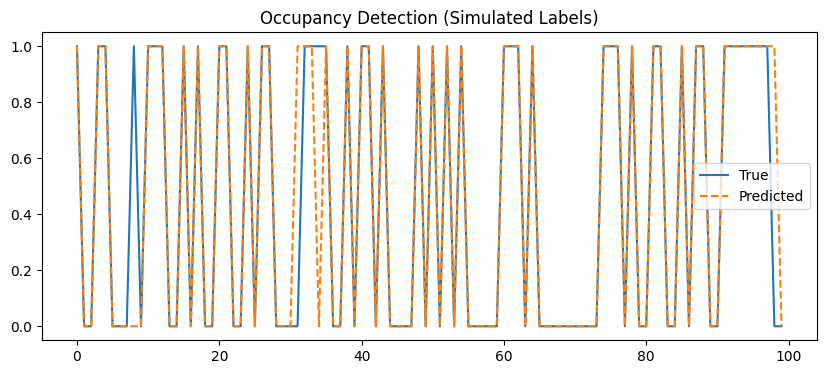

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading dataset
import gzip
with gzip.open('/128a-54.rss.csv.gz', 'rt') as f:
    df = pd.read_csv(f)

print("Shape:", df.shape)
print("Columns:", df.columns)

df = df.dropna().reset_index(drop=True)

feature_cols = ['RSS_A', 'RSS_B', 'RSS_C', 'AGC', 'NOISE']


# We are assuming first half = no presence, second half = presence
n = len(df)
half = n // 2
df['label'] = 0
df.loc[half:, 'label'] = 1


window_size = 100
features, labels = [], []

for i in range(0, len(df) - window_size, window_size):
    window = df.iloc[i:i+window_size]
    fvals = []
    for col in feature_cols:
        fvals += [
            np.mean(window[col]),
            np.std(window[col]),
            np.max(window[col]),
            np.min(window[col])
        ]
    features.append(fvals)
    labels.append(window['label'].iloc[-1])

X = np.array(features)
y = np.array(labels)

print("Feature shape:", X.shape, "Labels:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing
plt.figure(figsize=(10,4))
plt.plot(y_test[:100], label='True')
plt.plot(y_pred[:100], '--', label='Predicted')
plt.legend()
plt.title("Occupancy Detection (Simulated Labels)")
plt.show()


This uses RSS Dataset. This is good for rough occupancy detection but not ideal. We now will use CSI dataset and procced

In [ ]:
import gzip
import json

file_path = '/260-8.csi.json.gz'

data = []
with gzip.open(file_path, 'rt') as f:
    for i, line in enumerate(f):
        try:
            record = json.loads(line.strip())
            data.append(record)
        except json.JSONDecodeError:
            continue
        if i > 5:
            break

print("Loaded", len(data), "records (sample):")
print(json.dumps(data[:2], indent=2))



Loaded 7 records (sample):
[
  {
    "t": 1532362757.405442,
    "csi": [
      [
        {
          "r": 16,
          "i": -14
        },
        {
          "r": -6,
          "i": 21
        },
        {
          "r": -18,
          "i": -14
        }
      ],
      [
        {
          "r": 0,
          "i": -28
        },
        {
          "r": 20,
          "i": 21
        },
        {
          "r": -26,
          "i": 8
        }
      ],
      [
        {
          "r": -23,
          "i": -16
        },
        {
          "r": 29,
          "i": -7
        },
        {
          "r": -3,
          "i": 27
        }
      ],
      [
        {
          "r": -27,
          "i": 8
        },
        {
          "r": 11,
          "i": -28
        },
        {
          "r": 23,
          "i": 18
        }
      ],
      [
        {
          "r": -14,
          "i": 28
        },
        {
          "r": -18,
          "i": -25
        },
        {
          "r": 25,
    

In [ ]:
import numpy as np

def csi_to_complex(csi_entry):
    """
    Converts a CSI record to a 2D NumPy array of complex numbers.
    csi_entry: list of list of dicts with 'r' and 'i'
    """
    csi_complex = np.array([[complex(ele['r'], ele['i']) for ele in row] for row in csi_entry])
    return csi_complex

# Example for the first record
csi_complex_sample = csi_to_complex(data[0]['csi'])
print(csi_complex_sample)
print("Shape:", csi_complex_sample.shape)


[[ 16.-14.j  -6.+21.j -18.-14.j]
 [  0.-28.j  20.+21.j -26. +8.j]
 [-23.-16.j  29. -7.j  -3.+27.j]
 [-27. +8.j  11.-28.j  23.+18.j]
 [-14.+28.j -18.-25.j  25.-10.j]
 [ 11.+31.j -32. -1.j   9.-26.j]
 [ 29.+11.j -21.+24.j -18.-19.j]
 [ 28.-14.j   4.+30.j -28. +1.j]
 [ 10.-30.j  26.+16.j -14.+20.j]
 [-13.-27.j  29. -8.j   9.+23.j]
 [-28. -8.j  13.-26.j  25. +9.j]
 [-27.+14.j -11.-29.j  23.-14.j]
 [-11.+29.j -29.-11.j   6.-24.j]
 [ 13.+27.j -29.+13.j -17.-19.j]
 [ 20.+18.j -20.+22.j -26.-10.j]
 [ 29. +0.j   4.+30.j -23.+13.j]
 [ 20.-21.j  25.+17.j  -7.+27.j]
 [  2.-29.j  31. -7.j  17.+22.j]
 [-19.-22.j  15.-26.j  28. +1.j]
 [-28. -2.j  -9.-28.j  19.-21.j]
 [-22.+20.j -28.-12.j  -3.-27.j]
 [  0.+30.j -27.+12.j -24.-15.j]
 [ 21.+24.j  -9.+30.j -27. +9.j]
 [ 31. +2.j  15.+26.j  -8.+28.j]
 [ 18.-23.j  27. +3.j  13.+27.j]
 [ -7.-28.j  19.-19.j  27. +5.j]
 [-26.-13.j  -3.-27.j  19.-22.j]
 [-23.+13.j -22.-10.j  -7.-27.j]
 [ -3.+23.j -20.+10.j -24. -9.j]
 [  7.+19.j -11.+16.j -22. +4.j]]
Shape: (3

In [ ]:
def get_mag_phase(csi_complex):
    magnitude = np.abs(csi_complex)
    phase = np.angle(csi_complex)
    return magnitude, phase

mag, phase = get_mag_phase(csi_complex_sample)
print("Magnitude:\n", mag)
print("Phase:\n", phase)


Magnitude:
 [[21.26029163 21.84032967 22.8035085 ]
 [28.         29.         27.20294102]
 [28.01785145 29.83286778 27.16615541]
 [28.16025568 30.08321791 29.20616373]
 [31.30495168 30.8058436  26.92582404]
 [32.89376841 32.01562119 27.51363298]
 [31.01612484 31.89043744 26.17250466]
 [31.30495168 30.2654919  28.01785145]
 [31.6227766  30.52867504 24.41311123]
 [29.96664813 30.08321791 24.69817807]
 [29.12043956 29.06888371 26.57066051]
 [30.41381265 31.01612484 26.92582404]
 [31.01612484 31.01612484 24.73863375]
 [29.96664813 31.78049716 25.49509757]
 [26.90724809 29.73213749 27.85677655]
 [29.         30.2654919  26.41968963]
 [29.         30.23243292 27.89265136]
 [29.06888371 31.78049716 27.80287755]
 [29.06888371 30.01666204 28.01785145]
 [28.0713377  29.41088234 28.31960452]
 [29.73213749 30.46309242 27.16615541]
 [30.         29.54657341 28.3019434 ]
 [31.89043744 31.32091953 28.46049894]
 [31.06444913 30.01666204 29.12043956]
 [29.20616373 27.16615541 29.96664813]
 [28.86173938

In [ ]:
csi_magnitudes = []
csi_phases = []
timestamps = []

for record in data:
    csi_complex = csi_to_complex(record['csi'])
    mag, ph = get_mag_phase(csi_complex)
    csi_magnitudes.append(mag)
    csi_phases.append(ph)
    timestamps.append(record['t'])

csi_magnitudes = np.array(csi_magnitudes)
csi_phases = np.array(csi_phases)
timestamps = np.array(timestamps)

print("CSI Magnitudes shape:", csi_magnitudes.shape)
print("CSI Phases shape:", csi_phases.shape)


CSI Magnitudes shape: (7, 30, 3)
CSI Phases shape: (7, 30, 3)


In [ ]:
def extract_features(csi_mag, window_size=5):

    #Returns feature matrix X

    num_samples, num_subcarriers, num_antennas = csi_mag.shape
    features = []

    for sample in csi_mag:
        feat = []

        for ant in range(num_antennas):
            ant_mag = sample[:, ant]
            feat.append(np.mean(ant_mag))
            feat.append(np.var(ant_mag))
        features.append(feat)
    return np.array(features)

X = extract_features(csi_magnitudes)
print("Feature shape:", X.shape)


Feature shape: (7, 6)


In [ ]:
from sklearn.model_selection import train_test_split

y = np.array([1, 0, 1, 0, 1, 0, 1])  # Taking 7 sample records

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



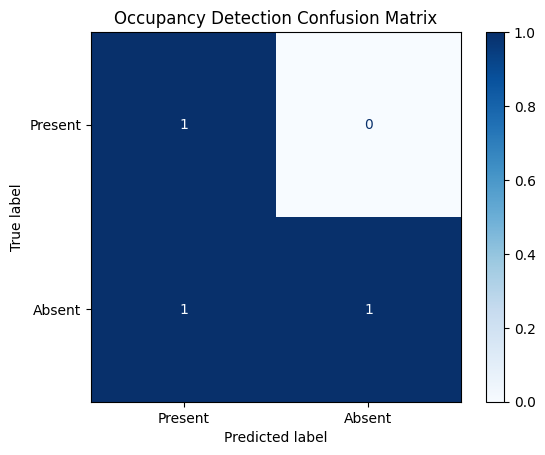

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Present","Absent"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Occupancy Detection Confusion Matrix")
plt.show()



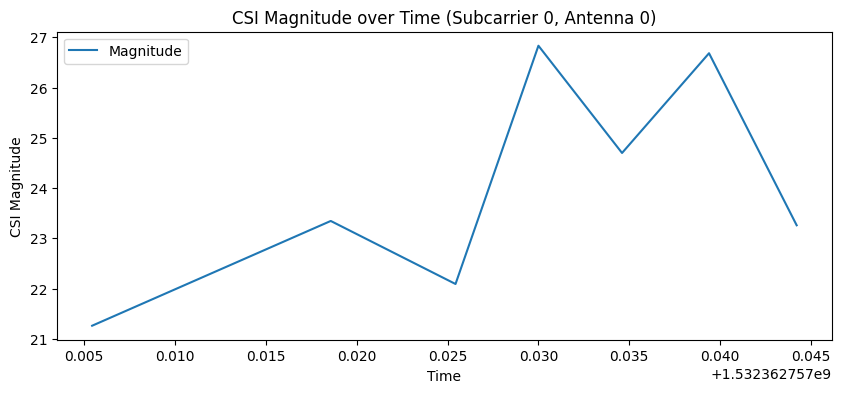

In [ ]:
plt.figure(figsize=(10,4))
subcarrier = 0
antenna = 0
plt.plot(timestamps, csi_magnitudes[:, subcarrier, antenna], label="Magnitude")
plt.xlabel("Time")
plt.ylabel("CSI Magnitude")
plt.title("CSI Magnitude over Time (Subcarrier 0, Antenna 0)")
plt.legend()
plt.show()


INCREASING THE ACCURACY OF THE MODEL
